In [3]:
import requests
import pandas as pd

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
results = []

for year in years:
    print(f"📅 Fetching data for {year}...")
    url = "https://api.ooni.io/api/v1/aggregation"
    params = {
        "axis_x": "probe_cc",
        "axis_y": "category_code",
        "test_name": "web_connectivity",
        "since": f"{year}-01-01",
        "until": f"{year}-12-31",
        "category_code": "NEWS"
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        blocked_countries = set()
        anomalous_countries = set()

        for row in data.get("result", []):
            if row.get("confirmed_count", 0) > 0:
                blocked_countries.add(row["probe_cc"])
            if row.get("anomaly_count", 0) > 0:
                anomalous_countries.add(row["probe_cc"])

        results.append({
            "year": year,
            "num_countries_confirmed": len(blocked_countries),
            "num_countries_anomalies": len(anomalous_countries)
        })

    else:
        print(f"❌ Failed to fetch data for {year}")
        results.append({
            "year": year,
            "num_countries_confirmed": 0,
            "num_countries_anomalies": 0
        })

# Convert to DataFrame
df = pd.DataFrame(results)

 

📅 Fetching data for 2017...
📅 Fetching data for 2018...
📅 Fetching data for 2019...
📅 Fetching data for 2020...
📅 Fetching data for 2021...
📅 Fetching data for 2022...
📅 Fetching data for 2023...
📅 Fetching data for 2024...


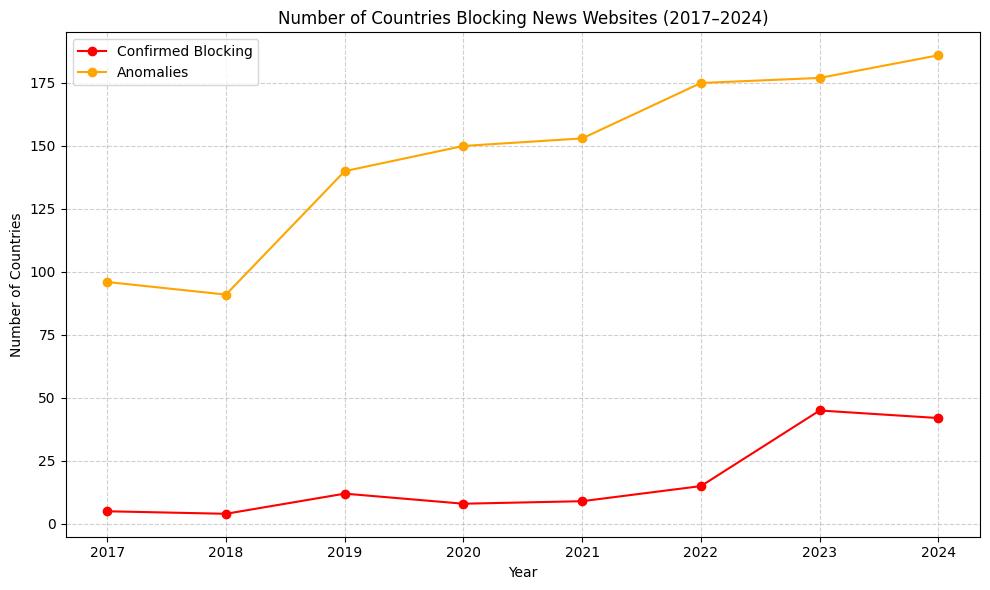

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["num_countries_confirmed"], label="Confirmed Blocking", marker='o', color='red')
plt.plot(df["year"], df["num_countries_anomalies"], label="Anomalies", marker='o', color='orange')

plt.title("Number of Countries Blocking News Websites (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(years)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
import requests
import pandas as pd

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
results = []

for year in years:
    print(f"📅 Fetching data for {year}...")
    url = "https://api.ooni.io/api/v1/aggregation"
    params = {
        "axis_x": "probe_cc",
        "axis_y": "category_code",
        "test_name": "web_connectivity",
        "since": f"{year}-01-01",
        "until": f"{year}-12-31",
        "category_code": "NEWS"
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        blocked_countries = set()
        anomalous_countries = set()

        for row in data.get("result", []):
            if row.get("confirmed_count", 0) > 0:
                blocked_countries.add(row["probe_cc"])
            if row.get("anomaly_count", 0) > 0:
                anomalous_countries.add(row["probe_cc"])

        results.append({
            "year": year,
            "num_countries_confirmed": len(blocked_countries),
            "num_countries_anomalies": len(anomalous_countries)
        })
    else:
        print(f"❌ Failed to fetch data for {year}")

# Convert to DataFrame
df = pd.DataFrame(results)




📅 Fetching data for 2017...
📅 Fetching data for 2018...
📅 Fetching data for 2019...
📅 Fetching data for 2020...
📅 Fetching data for 2021...
📅 Fetching data for 2022...
📅 Fetching data for 2023...
📅 Fetching data for 2024...


In [7]:
print(df.head(10))


   year  num_countries_confirmed  num_countries_anomalies
0  2017                        5                       96
1  2018                        4                       91
2  2019                       12                      140
3  2020                        8                      150
4  2021                        9                      153
5  2022                       15                      175
6  2023                       45                      177
7  2024                       42                      186


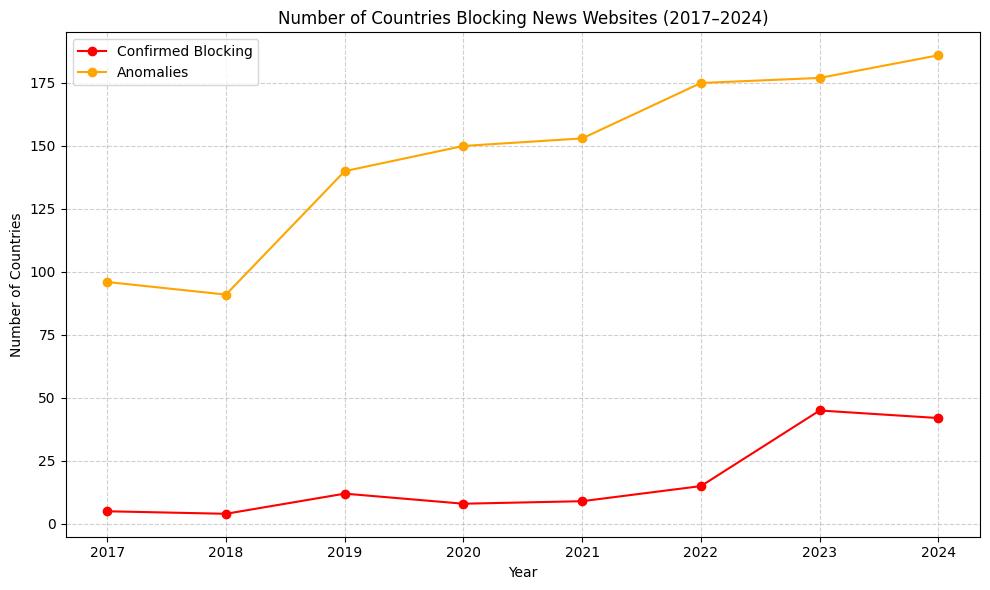

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["num_countries_confirmed"], label="Confirmed Blocking", marker='o', color='red')
plt.plot(df["year"], df["num_countries_anomalies"], label="Anomalies", marker='o', color='orange')

plt.title("Number of Countries Blocking News Websites (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(years)
plt.legend()
plt.tight_layout()
plt.show()